In [16]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from quadtree import FixedQuadTree

In [17]:
to_size = (8, 8, 3)
fixed_length = 194

# test_1_path = 'test1.jpg'
test_1_path = 'test3.JPEG'
test_1_path = 'test4.JPEG'

In [18]:
def seqence_image(image_path):
    img = cv.imread(image_path)
    img = cv.resize(img, (224, 224))
    img = img[..., ::-1]

    grey_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # grey_img = cv.GaussianBlur(grey_img, (3, 3), 0)

    edges = cv.Canny(grey_img, 80, 100)

    qdt = FixedQuadTree(domain = edges, fixed_length = fixed_length)

    seq_img = qdt.serialize(img, size = to_size)
    seq_img = np.asarray(seq_img)
    seq_img = np.reshape(seq_img, [to_size[0], -1, to_size[2]])

    return seq_img, qdt

In [19]:
seq_img, qdt = seqence_image(test_1_path)

seq_patch length: 194


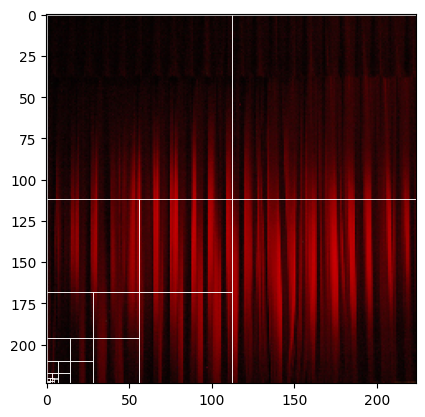

194


In [20]:
fig, ax = plt.subplots()
img = cv.imread(test_1_path)
img = cv.resize(img, (224, 224))
img = img[..., ::-1]
ax.imshow(img, cmap = 'gray')
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()